# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 5, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0

Marcel van de Lagemaat - 10886699 <br>
Anton Andersen - 14718758 

# The global keyword (helpful info for exercise 2)
In exercise 2 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1 (exercise 6.6(d), 2.5 pts)
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.

YOUR ANSWER HERE

---
# Exercise 2

## (a) (1 point)
The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

YOUR ANSWER HERE

## (b) (2 points)
Implement the method of steepest descent. Use `scipy.optimize.line_search` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum: Make a plot of the convergence in the $(x,y)$ plane as well as plot of the norm of the error as a function of the step number.


In [2]:
import sympy as sp
import numpy as np
from scipy.linalg import solve
import pandas as pd
from scipy.optimize import line_search

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

# Global variables
# x1, x2 = sp.symbols('x1 x2')
x_, y_ = sp.symbols('x y')
rb_gradient_call = 0
rb_call = 0
compute_gradient_call = 0
compute_func_call = 0

def gradient(func, var):
    """ Computes unevaluated derivatives for the gradient 
        input:
        func(expression) - the function to compute the gradient of
        var(simpy symbols) - the variables for which to compute the gradient

        returns:
        array of with the gradients
    """
    return np.array([sp.diff(func, v) for v in var])


def compute_gradient(vars, points, gradient_func):
    """ Evaluates gradient of gradient_func at point x_k for variables x
        input:
        x
    """
    global compute_gradient_call
    compute_gradient_call += 1
    
    grad_f = []
    for f in range(len(vars)):
        grad = gradient_func[f].subs([(vars[i], points[i]) for i in range(len(vars))])
        grad_f.append(float(grad))
    
    return np.array(grad_f)


def stop(x_k):
    global conv
    norm = np.linalg.norm(x_k - conv, 2)
    if norm < 10 ** -5:
        return 1
    else:
        return 0


def plot3d(func, limits, conv):
    print(func)
    min, max, zmax = limits
    gridsize = np.linspace(min,max,50)
    X, Y = np.meshgrid(gridsize, gridsize)
    Z = np.array([[func.subs([(x_, X[j,i]), (y_,Y[j,i])]) for i in range(len(X))] for j in range(len(Y))])

    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, label='f(x,y)')
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    ax.set_xlim(min,max)
    ax.set_xlabel('x')
    ax.set_ylim(min,max)
    ax.set_ylabel('y')
    ax.set_zlim(0,zmax)
    ax.set_zlabel('f(x,y)')
    
    x_1, x_2, val = conv
    ax.plot3D(x_1, x_2, val, color='r', label='Convergence')
    ax.plot3D(x_1[0], x_2[0], val[0], marker='o', label='Initial guess')
    ax.plot3D(x_1[-1], x_2[-1], val[-1], marker='o', label='Convergence point')
    ax.legend()
    plt.show()

 The result is of the optimization is [0.99742316 0.99484502]
(1 - y)**2 + 100*(-x**2 + y)**2


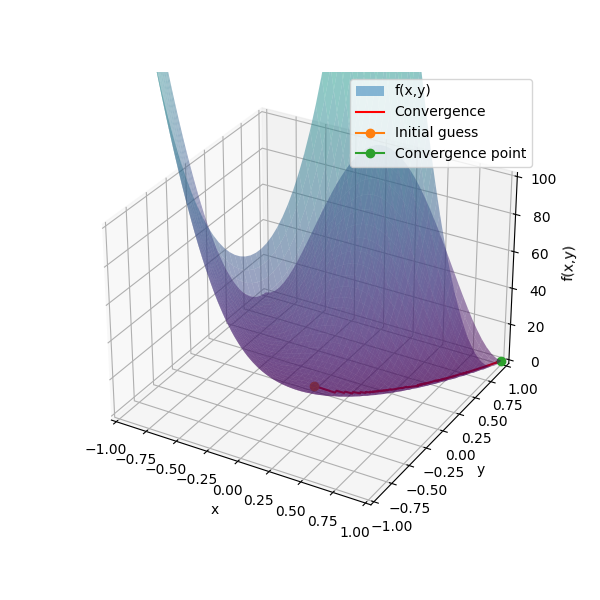

In [3]:
def rb(x):
    global rb_call
    rb_call += 1
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def rb_gradient(x):
    x0 = 400 * x[0] ** 3 - 400 * x[1] * x[0] + 2 * x[0] - 2
    x1 = 200 * x[1] - 200 * x[0] ** 2
    global rb_gradient_call 
    rb_gradient_call += 1
    return np.array([x0, x1])

def steepest_descent(initial_guess, k):
    """ k - number of iterations
    """
    x = initial_guess
    points = np.zeros([k+1, 2])
    points[0,:] = initial_guess
    for i in range(k):
        s = - rb_gradient(x)                            # get the gradient of the function. 
        alpha_k = line_search(rb, rb_gradient, x, s)[0] # function, gradient, starting point, direction. Select first element in res (alpha)
        x = x + alpha_k * s                             # update x using alpha and s
        points[i+1,:] = x                               # store the points

        # Stopping criterion
        if stop(x):
            break

    return x, points

conv = np.array([1,1])
x, points = steepest_descent([0, 0], 2000)
print(f' The result is of the optimization is {x}')
rb_points = [rb([x[0],x[1]]) for x in points]

rosenbrock = 100 * (y_ - x_ ** 2) ** 2 + (1 - x_) ** 2
plot3d(rosenbrock, [-1,1,100], [points[:,0], points[:,1], rb_points])

## (c) (1.5 points)

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

0.5*x**2 + 2.5*y**2


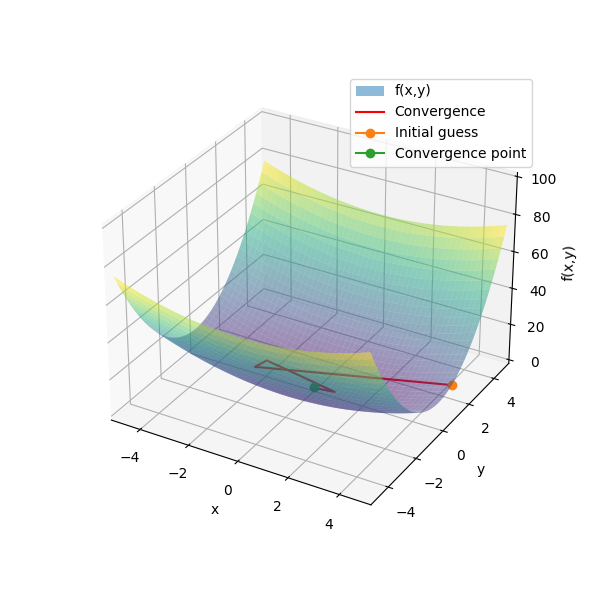

,x_k,f(x_k),grad_f(x_k)
0,"[5, 1]",15.0000000000000,"[5.0, 5.0]"
1,"[0.0, -4.0]",40.0000000000000,"[0.0, -20.0]"
2,"[-2.2222222222222223, 0.44444444444444464]",2.96296296296296,"[-2.2222222222222223, 2.222222222222223]"
3,"[0.8163265306122445, 0.08163265306122452]",0.349854227405247,"[0.8163265306122445, 0.4081632653061226]"
4,"[-0.009153143532732111, -0.015331515417326136]",0.000629528430744670,"[-0.009153143532732111, -0.07665757708663068]"
5,"[-0.000542327940288018, 0.0009233940711360737]",2.27870132393165e-6,"[-0.000542327940288018, 0.004616970355680369]"


In [4]:
def BFGS(func, x, x_0, K):
    global compute_func_call
    x_k = x_0
    B_k = np.eye(len(x))

    df_dict = {'x_k':[], 'f(x_k)':[], 'grad_f(x_k)':[]}

    gradient_func = gradient(func, x)
    
    for k in range(K):
        grad_f = compute_gradient(x, x_k, gradient_func)

        df_dict['x_k'].append(x_k)
        df_dict['f(x_k)'].append(func.subs([(x[i], x_k[i]) for i in range(len(x))]))
        df_dict['grad_f(x_k)'].append(grad_f)
        
        s = solve(B_k, -grad_f)
        x_k1 = x_k + s
        y = compute_gradient(x, x_k1, gradient_func) - grad_f

        B_k = B_k + np.outer(y, y.T) / np.dot(y.T, s) - \
              np.outer(np.dot(B_k, s), s.T) @ B_k / (np.dot(s.T, B_k) @ s)
        x_k = x_k1
        if stop(x_k):
            break

    return pd.DataFrame(df_dict)

# Define function, set convergence to test
testfunction = 0.5 * x_ ** 2 + 2.5 * y_ ** 2
conv = np.array([0,0])

# Get result and plot 
res = BFGS(testfunction, [x_,y_], [5,1], 6)
x_1 = [r[0] for r in res['x_k']]
y_1 = [r[1] for r in res['x_k']]
test = [testfunction.subs([(x_, c[0]), (y_, c[1])]) for c in res['x_k']]
convergence = [x_1, y_1, test]

plot3d(testfunction, (-5,5,100), convergence)
res

## (d) (1 points)

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

In [5]:
# Reset calls, set convergenge point to check
compute_gradient_call = 0
compute_func_call = 0
conv = np.array([1,1])

res = BFGS(rosenbrock, [x_,y_], [0,0], 45)
x_1 = [r[0] for r in res['x_k']]
y_1 = [r[1] for r in res['x_k']]
rosen = [rosenbrock.subs([(x_, c[0]), (y_, c[1])]) for c in res['x_k']]
convergence = [x_1, y_1, rosen]

plot3d(rosenbrock, [-1,1,100], convergence)

/tmp/ipykernel_306589/311744982.py:21: RuntimeWarning: invalid value encountered in true_divide
  B_k = B_k + np.outer(y, y.T) / np.dot(y.T, s) - \
/tmp/ipykernel_306589/311744982.py:22: RuntimeWarning: invalid value encountered in true_divide
  np.outer(np.dot(B_k, s), s.T) @ B_k / (np.dot(s.T, B_k) @ s)


ValueError: array must not contain infs or NaNs

## (e) (1 point)
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.

In [ ]:
print(f'Steepest descent function calls: {rb_call} and gradient calls: {rb_gradient_call}')
print(f'BFGS function calls: {compute_func_call} and gradient calls: {compute_gradient_call}')

YOUR ANSWER HERE